In [2]:
import pandas as pd
df = pd.read_csv('mon_fichier.csv')

In [3]:
df.head()

,Age,Gender,Hx Radiothreapy,Focality,Risk,T,N,M,Stage,Response,Recurred,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,34,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,30,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,62,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,62,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [4]:
# Separate features (X) and target (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [5]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 306
Testing samples: 77


In [6]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model with hyperparameters
model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=5,             # Limit tree depth to prevent overfitting
    random_state=42          # For reproducibility
)

# Train (fit) the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77

Confusion Matrix:
[[58  0]
 [ 3 16]]


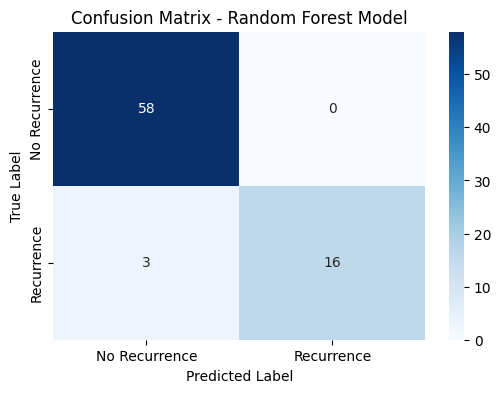

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # make sure y_pred comes from Random Forest

# Step 2: Define class labels
labels = ['No Recurrence', 'Recurrence']

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

# Step 4: Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

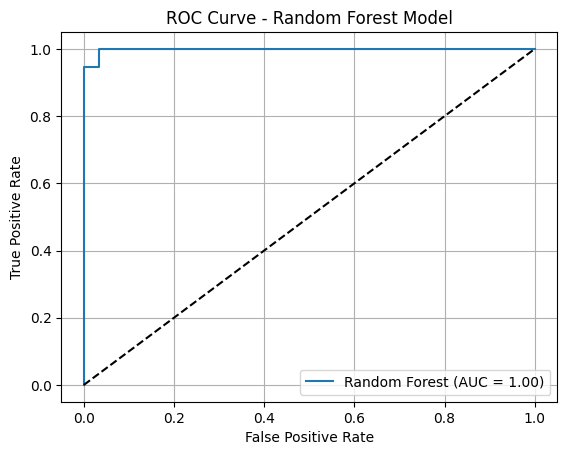

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities (class 1 = "Recurrence")
y_proba_rf = model.predict_proba(X_test)[:, 1]  # 'model' should be your RandomForestClassifier

# Step 2: Compute AUC score
roc_auc = roc_auc_score(y_test, y_proba_rf)

# Step 3: Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

# Step 4: Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend()
plt.grid()
plt.show()